In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
from wordcloud import WordCloud , ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [ ]:
pwd

'/content'

In [ ]:
data=pd.read_csv('Swiggy Dataset - Sheet1.csv')

In [ ]:
data.head()

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id
0,7/18/2019 22:47,0,82,219,@Mahi_2510 @swiggy_in The ultimate answer will...,0,False,syamantak1,1,"61,959,419"
1,7/18/2019 22:43,0,102,129,@SwiggyCares I hope so.,0,False,Bharatbbhushn,2,"143,284,383"
2,7/18/2019 22:37,0,102,129,@SwiggyCares I think you have the order detail...,0,False,Bharatbbhushn,3,"143,284,383"
3,7/18/2019 22:35,0,13,16,"@swiggy_in People are complaining here also, i...",0,False,taifkhalid01,4,"830,340,000,000,000,000"
4,7/18/2019 22:25,0,102,129,@SwiggyCares Do you even know the meaning of y...,0,False,Bharatbbhushn,5,"143,284,383"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             16712 non-null  object
 1   favorite_count   16712 non-null  int64 
 2   followers_count  16712 non-null  int64 
 3   friends_count    16712 non-null  int64 
 4   full_text        16712 non-null  object
 5   retweet_count    16712 non-null  int64 
 6   retweeted        14384 non-null  object
 7   screen_name      16712 non-null  object
 8   tweet_id         16712 non-null  object
 9   user_id          16712 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.3+ MB


In [ ]:
# Checking for Nulls
data.isnull().sum()

date                  0
favorite_count        0
followers_count       0
friends_count         0
full_text             0
retweet_count         0
retweeted          2328
screen_name           0
tweet_id              0
user_id               0
dtype: int64

#### Conclusion: We can see some nulls in the "retweeted" columns which will be treated.

### Feature Engineering some of the attributes

In [ ]:
# Converting the "date" column from "object" to "datetime"
data['date']=pd.to_datetime(data['date'])

In [ ]:
# Extracting the date from datetime as a new Attribute as M
data['JUST_DATE']=data['date'].dt.to_period('D')
data['JUST_DATE']

0        2019-07-18
1        2019-07-18
2        2019-07-18
3        2019-07-18
4        2019-07-18
            ...    
16707    2019-07-11
16708    2019-07-11
16709    2019-07-11
16710    2019-07-11
16711    2019-07-11
Name: JUST_DATE, Length: 16712, dtype: period[D]

In [ ]:
data['JUST_DATE'].min(),data['JUST_DATE'].max()

(Period('2019-06-01', 'D'), Period('2019-07-18', 'D'))

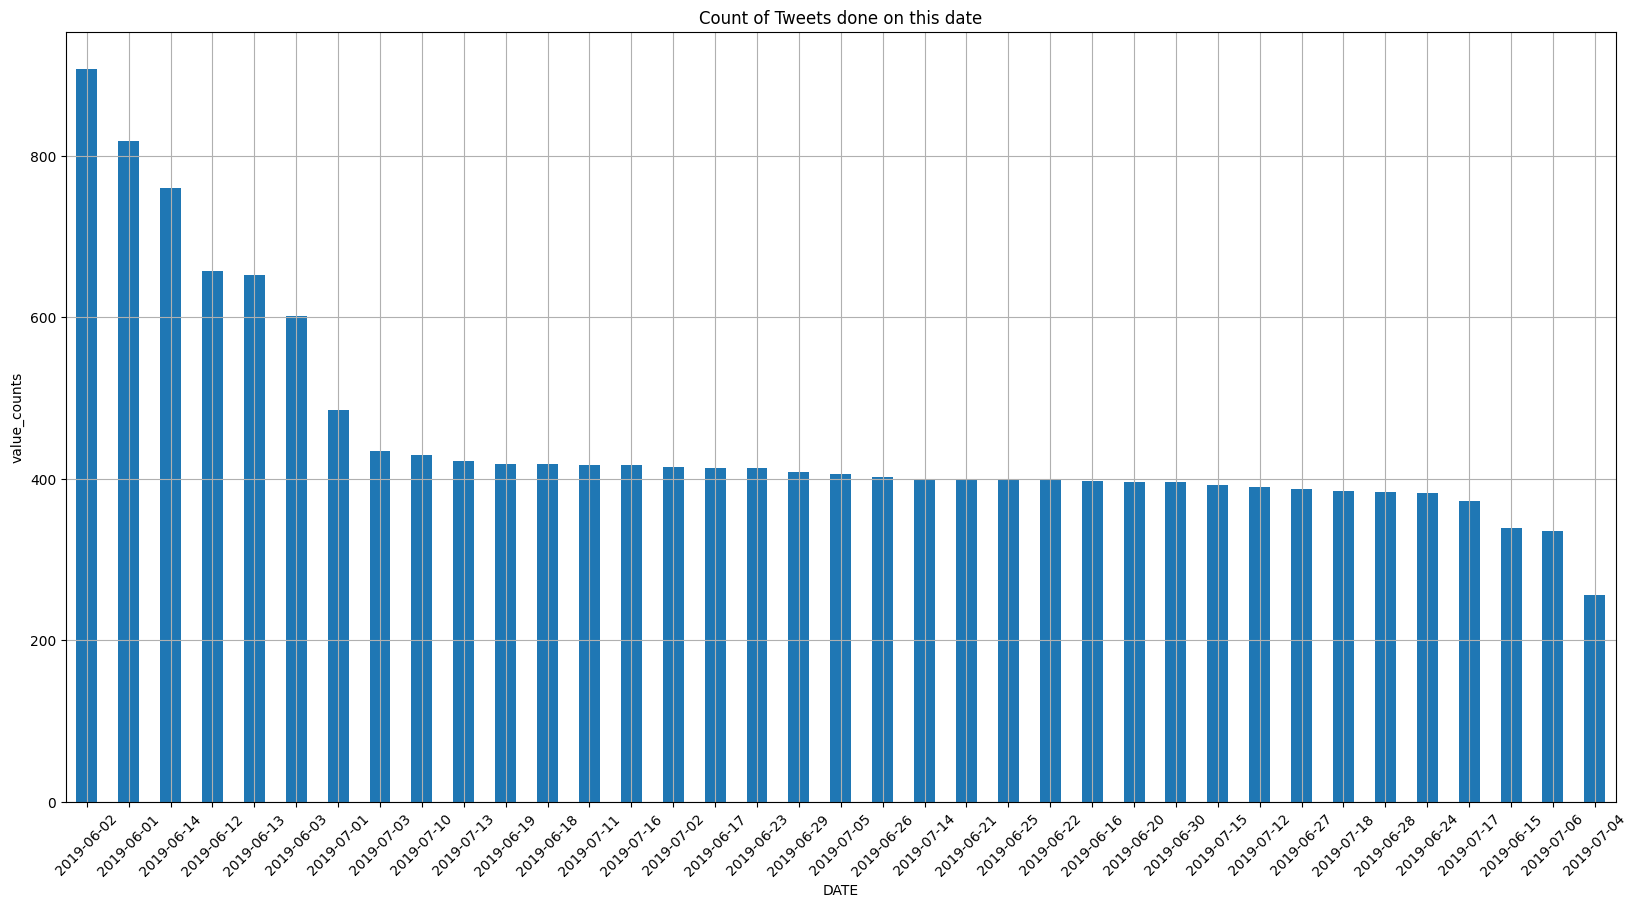

In [ ]:
data.JUST_DATE.value_counts().plot.bar(figsize=(20,10),title='Count of Tweets done on this date')
plt.xlabel('DATE')
plt.ylabel('value_counts')
plt.xticks(rotation=45)
plt.grid()

#### Conclusion: As we can understand from the Graph that most of the "Tweets" were done on "2019-06-02"
##### Reasons can be like:
1- More Foods were ordered on this day due to which they would have Experiented something bad or Good Experience by Swiggy.

In [ ]:
DATE_COUNT=data['JUST_DATE'].value_counts()
df_reg_count=pd.DataFrame(DATE_COUNT)
df_reg_count.rename({'JUST_DATE':'DATE_COUNT'},axis='columns',inplace=True)
df_reg_count.sort_index(ascending=True,inplace=True)
df_reg_count.head()

,count
JUST_DATE,
2019-06-01,818
2019-06-02,908
2019-06-03,602
2019-06-12,657
2019-06-13,652


<Axes: xlabel='JUST_DATE'>

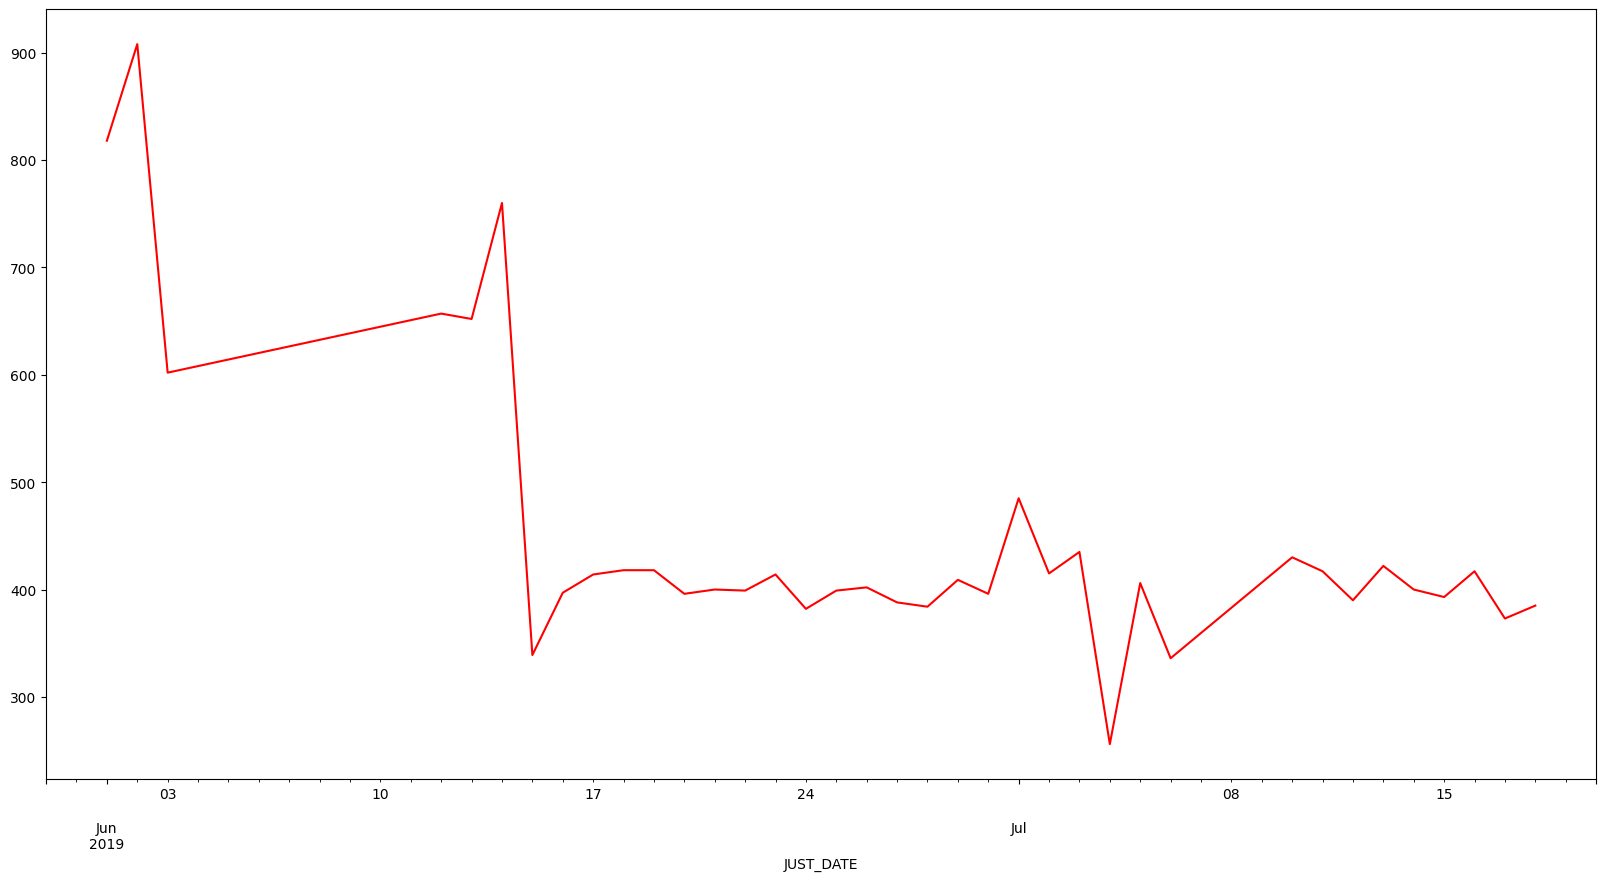

In [ ]:
# To understand the trend in the data
df_reg_count['count'].plot(xlim=['2019-05-30','2019-7-20'],figsize=(20,10),color='r')

#### Conclusion: the Trend is going Down So,we can say that maybe the orders have reduced with time or maybe the customer's are not facing much problems So,they stopped tweeting much as before.

In [ ]:
data['retweeted'].value_counts()

retweeted
False    14384
Name: count, dtype: int64

In [ ]:
data[data['retweeted']==False]['retweet_count']

0        0
1        0
2        0
3        0
4        0
        ..
16707    0
16708    0
16709    0
16710    0
16711    0
Name: retweet_count, Length: 14384, dtype: int64

In [ ]:
data[(data['retweeted']==False) & (data['retweet_count']>=1)]

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id,JUST_DATE
9,2019-07-18 22:17:00,0,102,129,I hope you hire educated professionals @swiggy...,1,False,Bharatbbhushn,10,"143,284,383",2019-07-18
40,2019-07-18 20:23:00,0,11,188,@SwiggyCares I have already shared with you bu...,1,False,JRPalai,41,"435,769,930",2019-07-18
98,2019-07-18 18:34:00,0,213,275,@babagolmaal @swiggy @SwiggyCares @UfterYou @A...,1,False,imayank_kothari,99,"2,623,291,070",2019-07-18
122,2019-07-18 18:05:00,1,31,430,@SwiggyCares and @Uber_India @Olacabs please h...,3,False,AmarnathGowtham,123,"875,359,000,000,000,000",2019-07-18
159,2019-07-18 17:21:00,10,3510,1991,Forgot to tweet earlier. \n \n My breakfast to...,1,False,saurabh,160,"6,325",2019-07-18
...,...,...,...,...,...,...,...,...,...,...,...
16653,2019-07-11 13:37:00,0,112,108,@SwiggyCares @azzythejazzy Here's the proof of...,1,False,madan_ashish,"16,654","845,840,786",2019-07-11
16660,2019-07-11 13:26:00,0,10,116,@newproblem @UfterYou @ZomatoIN @Zomato @Zomat...,1,False,deepakwadhawan,"16,661","1,022,850,000,000,000,000",2019-07-11
16679,2019-07-11 13:07:00,5,366,85,"Cheated by @swiggy for 500th time, I guess. EX...",4,False,babagolmaal,"16,680","3,240,109,257",2019-07-11
16696,2019-07-11 12:43:00,2,6,24,Terrible product. Thank God that 4-year-old gi...,1,False,PrabhakaranBha2,"16,697","3,150,829,422",2019-07-11


#### Observation: we can understand from the data that from "retweeted" and "retweet_count" that some customers have retweeted but its showing "False" which need to be changed to "True".

In [ ]:
data['retweeted'].value_counts()

retweeted
False    14384
Name: count, dtype: int64

In [ ]:
data.columns

Index(['date', 'favorite_count', 'followers_count', 'friends_count',
       'full_text', 'retweet_count', 'retweeted', 'screen_name', 'tweet_id',
       'user_id', 'JUST_DATE'],
      dtype='object')

In [ ]:
df_tweet=data.drop(['date', 'favorite_count', 'followers_count', 'friends_count',
       'full_text','screen_name', 'tweet_id',
       'user_id'],axis=1)
df_tweet

,retweet_count,retweeted,JUST_DATE
0,0,False,2019-07-18
1,0,False,2019-07-18
2,0,False,2019-07-18
3,0,False,2019-07-18
4,0,False,2019-07-18
...,...,...,...
16707,0,False,2019-07-11
16708,0,False,2019-07-11
16709,0,False,2019-07-11
16710,0,False,2019-07-11


In [ ]:
# Firstly replacing all the Retweet that are "False" but showing retweet_count more than and equal to 0 to "True"
df_tweet[(df_tweet['retweeted']==False) & (df_tweet['retweet_count']>=1)]=True


In [ ]:
# Treating the Nulls

# When retweeted contains nulls and retweet_count is equal to 0 then its "false"
df_tweet[(df_tweet['retweeted'].isnull()) & (df_tweet['retweet_count']==0)]=False

# When retweeted contains nulls and retweet_count is more than or equal to 1 then its "True"
df_tweet[(df_tweet['retweeted'].isnull()) & (df_tweet['retweet_count']>=1)]=True

In [ ]:
df_tweet['retweeted'].value_counts()

retweeted
False    15734
True       978
Name: count, dtype: int64

In [ ]:
data.drop(['retweeted','JUST_DATE'],axis=1,inplace=True)
df_tweet.drop(['retweet_count'],axis=1,inplace=True)

In [ ]:
df=pd.concat([data,df_tweet],axis=1)
df.head()

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,screen_name,tweet_id,user_id,retweeted,JUST_DATE
0,2019-07-18 22:47:00,0,82,219,@Mahi_2510 @swiggy_in The ultimate answer will...,0,syamantak1,1,"61,959,419",False,2019-07-18
1,2019-07-18 22:43:00,0,102,129,@SwiggyCares I hope so.,0,Bharatbbhushn,2,"143,284,383",False,2019-07-18
2,2019-07-18 22:37:00,0,102,129,@SwiggyCares I think you have the order detail...,0,Bharatbbhushn,3,"143,284,383",False,2019-07-18
3,2019-07-18 22:35:00,0,13,16,"@swiggy_in People are complaining here also, i...",0,taifkhalid01,4,"830,340,000,000,000,000",False,2019-07-18
4,2019-07-18 22:25:00,0,102,129,@SwiggyCares Do you even know the meaning of y...,0,Bharatbbhushn,5,"143,284,383",False,2019-07-18


In [ ]:
df[df['followers_count']==df['followers_count'].max()]['screen_name']

11480    htTweets
Name: screen_name, dtype: object

#### Observation:  'htTweets' has the most numbers of followers in tweeter

In [ ]:
df[df['friends_count']==df['friends_count'].max()]['screen_name']

2165    flywithsid
Name: screen_name, dtype: object

#### Observation: "flywithsid" have the most friends in tweeter

In [ ]:
df['screen_name'].value_counts().head(3)

screen_name
SandipThink        71
SwiggyCares        70
Vineeta75481990    53
Name: count, dtype: int64

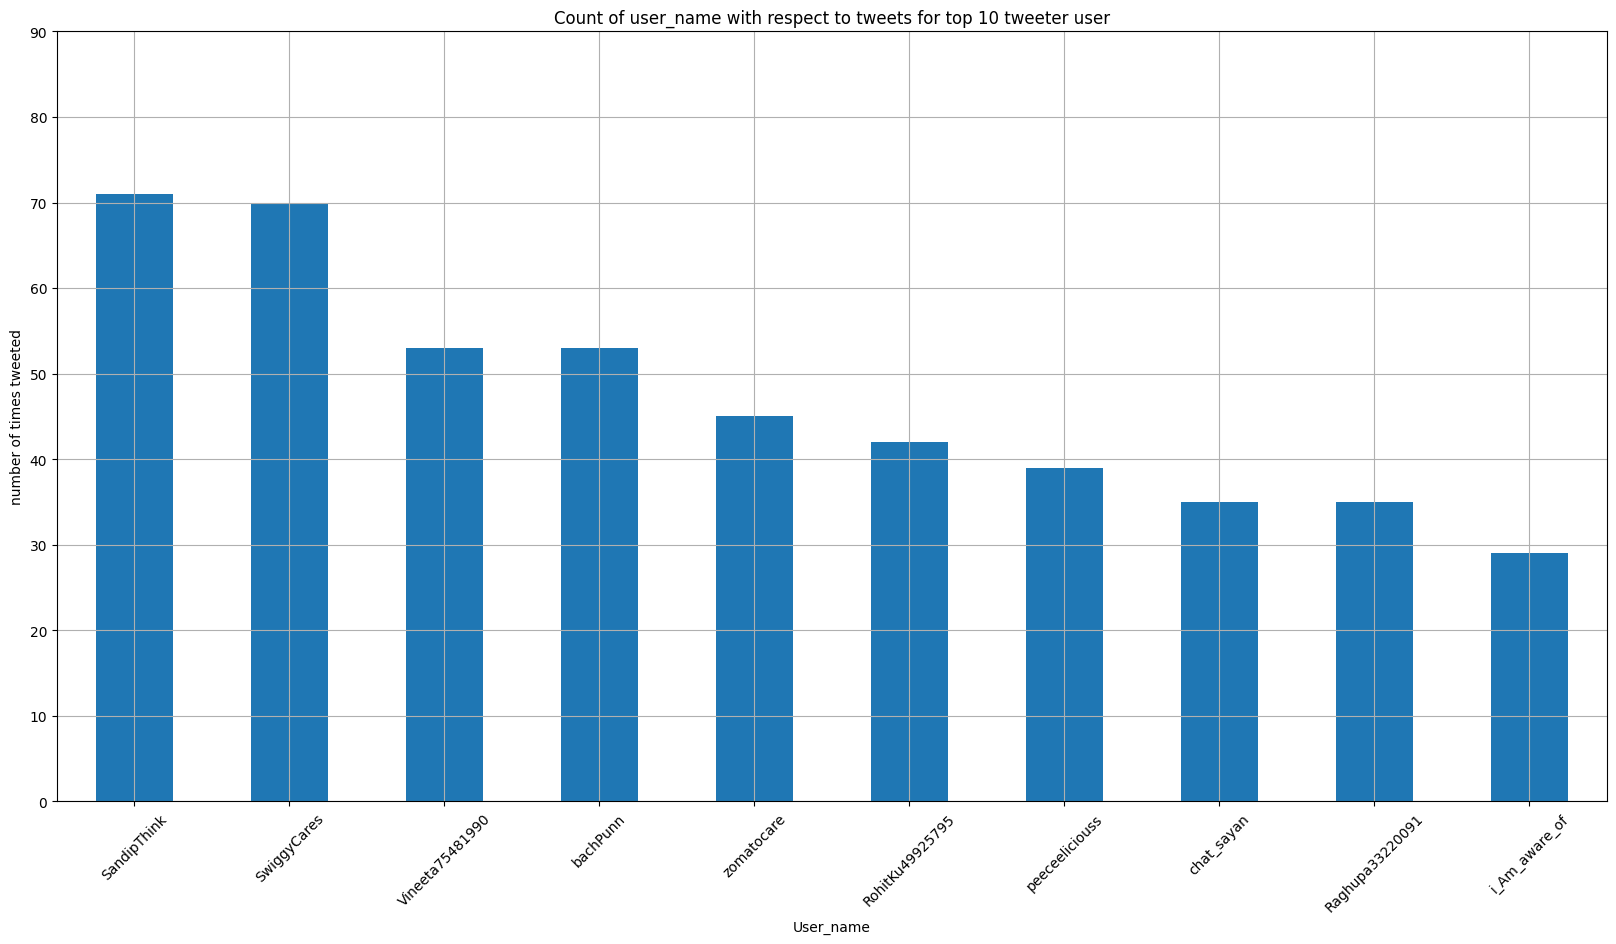

In [ ]:
### Count of user_name with respect to tweets
plt.figure(figsize = (20,10))
df.groupby(['screen_name'])['screen_name'].size().sort_values(ascending= False).head(10).plot(kind='bar')
plt.xlabel('User_name')
plt.xticks(rotation = 45)
plt.ylim(0,90)
plt.ylabel('number of times tweeted')
plt.title('Count of user_name with respect to tweets for top 10 tweeter user')
plt.grid()

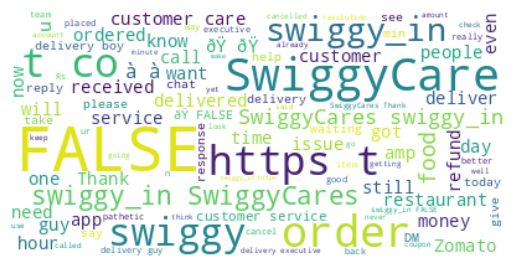

In [3]:

!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def word_plot(text):
  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

# Extract text from the csv file
with open('/Swiggy Dataset - Sheet1.csv', 'r') as f:
  text = f.read()

# Create a word plot
word_plot(text)

In [ ]:
for i in df[df['screen_name']=='SandipThink']['full_text'].head(7):
    print(i)

@SwiggyCares @MirrorofFuture1 Have already stopped using them
@mesinghshubham @SwiggyCares Due to this I have stopped using them
@SwiggyCares @JainAmitTS They just give copy paste replies to everything without providing a resolution
@SwiggyCares @mesinghshubham Don't expect good services from them.. they will just assure you of improving services in future and will keep repeating mistakes
@SwiggyCares I'm not initiating any dm
@SwiggyCares I have already shared the details many times during last month... I do not have patience nor the time to share details again and again for your convenience
@SwiggyCares @shadysachin Don't expect good services from them... They contradict their own statements and customer has to suffer for their poor services.. better to look for alternatives


#### Observation: "SandipThink" has tweeted the most  regarding the Complaints about food and delivery which should be solved immediately by Swiggy and there team and should ensure next time even other customers are not facing such problems.

In [ ]:
df_new=df.drop(['date', 'favorite_count', 'followers_count', 'friends_count','retweet_count', 'retweeted', 'screen_name', 'tweet_id','user_id'],axis=1)
df_new.head(5)

,full_text,JUST_DATE
0,@Mahi_2510 @swiggy_in The ultimate answer will...,2019-07-18
1,@SwiggyCares I hope so.,2019-07-18
2,@SwiggyCares I think you have the order detail...,2019-07-18
3,"@swiggy_in People are complaining here also, i...",2019-07-18
4,@SwiggyCares Do you even know the meaning of y...,2019-07-18


In [ ]:
!pip install nltk
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('wordnet') # Download the WordNet corpus

stopword = nltk.corpus.stopwords.words('english')
lemmatizer=WordNetLemmatizer()
corpus=[]
for i in range(len(df_new)):
    review=re.sub('[^a-zA-Z]',' ',df_new['full_text'][i]) # removing all the character other than alphabets
    review=review.lower()                  # Lowering all the cases
    review=review.split()                  # spliting the sentence -> words for lemmatization
    review=[lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))] # removing stopwords
    review=' '.join(review)                # joining the words to rearrage to form the sent without stop words
    corpus.append(review)                  # Appending to corpus

[nltk_data] Downloading package wordnet to /root/nltk_data...


## Sentiment Analysis  


In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df_new['polarity_score'] = df_new['full_text'].apply(lambda x : polarity(str(x)))

def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'

df_new['polarity'] = df_new['polarity_score'].map(lambda x: sentiment(x))

In [ ]:
fig = go.Figure(data=[go.Pie(labels=df_new['polarity'].value_counts().index.tolist(),
                             values=df_new['polarity'].value_counts().tolist(),
                            marker=dict(colors=['#006400','#8B0001','#add8e3']))])

fig.update_layout(title_text='Proportion of Sentiments',title_x=0.5,
                  template='plotly_white')
fig.show()

#### Observation : The Above Pie charts tells us the proportion of "positive" ,"Negative" & "neural" comments from Customers where Swiggy can improve there Facilities

### Clustering the tweets into various themes like Positive,Negative & Neutral

In [ ]:
stop_words = stopwords.words('english')
def get_data(df_new,senti):
    s_df = df_new[df_new['polarity']==senti].reset_index()

    s_corpus = []
    for i in range(0,len(s_df)):
        text = re.sub('[^a-zA-Z]', ' ', s_df['full_text'][i])
        text = text.lower()
        text = text.split()
        text = [lemmatizer.lemmatize(word) for word in text if not word in stop_words]
        text = ' '.join(text)
        s_corpus.append(text)
    return s_corpus

p_corpus = get_data(df_new,'positive')
p_corpus=pd.DataFrame(p_corpus)

n_corpus = get_data(df_new,'negative')
n_corpus=pd.DataFrame(n_corpus)

nt_corpus = get_data(df_new,'neutral')
nt_corpus=pd.DataFrame(nt_corpus)

In [ ]:
p_corpus.shape,n_corpus.shape,nt_corpus.shape

((5461, 1), (5462, 1), (5789, 1))

In [ ]:
df_new.drop('polarity_score',axis=1,inplace=True)
df_new.rename(columns={"polarity": "Sentiment"},inplace=True)
df_new.head()

,full_text,JUST_DATE,Sentiment
0,@Mahi_2510 @swiggy_in The ultimate answer will...,2019-07-18,negative
1,@SwiggyCares I hope so.,2019-07-18,neutral
2,@SwiggyCares I think you have the order detail...,2019-07-18,positive
3,"@swiggy_in People are complaining here also, i...",2019-07-18,positive
4,@SwiggyCares Do you even know the meaning of y...,2019-07-18,neutral


In [ ]:
# Label Encoding "Sentiment" Column

df_new['Sentiment']=df_new['Sentiment'].replace(to_replace=['negative', 'neutral', 'positive'],value=[-1,0,1])
df_new.head()

,full_text,JUST_DATE,Sentiment
0,@Mahi_2510 @swiggy_in The ultimate answer will...,2019-07-18,-1
1,@SwiggyCares I hope so.,2019-07-18,0
2,@SwiggyCares I think you have the order detail...,2019-07-18,1
3,"@swiggy_in People are complaining here also, i...",2019-07-18,1
4,@SwiggyCares Do you even know the meaning of y...,2019-07-18,0


# Model Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

### 1:Using Bag of Words

In [ ]:
# Converting the Words to Vector using Bag of words

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500,ngram_range=(1,3)) # top 2500 features are taken
X=cv.fit_transform(corpus).toarray()
y=df_new['Sentiment']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

In [ ]:
#Naive Bayes Model

from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
MultinomialNB()
train_pred=nb.predict(x_train)
test_pred=nb.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

          -1       0.72      0.72      0.72      1088
           0       0.77      0.76      0.76      1181
           1       0.72      0.73      0.72      1074

    accuracy                           0.74      3343
   macro avg       0.74      0.74      0.74      3343
weighted avg       0.74      0.74      0.74      3343



In [ ]:
#Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
RandomForestClassifier()
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

          -1       0.75      0.81      0.78      1018
           0       0.90      0.76      0.82      1377
           1       0.72      0.83      0.77       948

    accuracy                           0.79      3343
   macro avg       0.79      0.80      0.79      3343
weighted avg       0.80      0.79      0.79      3343



#### Conclusion: Here we get a very good Model using 'Bag Of words' but Still the Semantic meaning will be missing So, to overcome this problem we are further going for TF-IDF Technique

### 2: Using Term Frequency-Inverse Document Frequency

In [ ]:
# Converting the Words to Vector using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,3),max_features=3000)
X=tf.fit_transform(corpus).toarray()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

In [ ]:
# Naive Bayes Model

nb.fit(x_train,y_train)
MultinomialNB()
train_pred=nb.predict(x_train)
test_pred=nb.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

          -1       0.73      0.70      0.72      1142
           0       0.74      0.74      0.74      1148
           1       0.70      0.72      0.71      1053

    accuracy                           0.72      3343
   macro avg       0.72      0.72      0.72      3343
weighted avg       0.72      0.72      0.72      3343



In [ ]:
# Random Forest Model

rfc.fit(x_train,y_train)
RandomForestClassifier(n_estimators=[200],criterion='entropy',max_depth=[5,10,20,25])
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

          -1       0.74      0.78      0.76      1044
           0       0.87      0.74      0.79      1363
           1       0.70      0.81      0.75       936

    accuracy                           0.77      3343
   macro avg       0.77      0.77      0.77      3343
weighted avg       0.78      0.77      0.77      3343



In [ ]:
# Xgboost  Model

from xgboost import XGBClassifier
XGB = XGBClassifier()

XGB.fit(x_train,y_train)
MultinomialNB()
train_pred=XGB.predict(x_train)
test_pred=XGB.predict(x_test)
print(classification_report(test_pred,y_test))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [-1  0  1]

In [ ]:
# Xgboost  Model

from xgboost import XGBClassifier
import numpy as np # Import numpy for array manipulation

XGB = XGBClassifier()

# Adjust y values to be non-negative
y_train_adjusted = y_train + 1  # Shift values up by 1
XGB.fit(x_train, y_train_adjusted)  # Fit with adjusted y values

# Remember to adjust predictions when using the trained model
train_pred=XGB.predict(x_train) - 1  # Shift predictions back down by 1
test_pred=XGB.predict(x_test) - 1
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

          -1       0.76      0.89      0.82       942
           0       0.96      0.76      0.85      1459
           1       0.75      0.87      0.81       942

    accuracy                           0.83      3343
   macro avg       0.83      0.84      0.83      3343
weighted avg       0.85      0.83      0.83      3343



#### Conclusion: So, by using the algorithm as XG Boost Classifier we are getting a better model having a Good Precison, Recall and Accuracy So, we can Conclude that the 'full_text' and the 'Sentiment' are very much Similar ,Hence Swiggy can actually focus on the "Negative" sentiments more and social media team can understand the urgency with which they have to react for that tweet.

### Testing our Model

In [ ]:
print('Test 1')
test1 = ["Food was really good"]
test_vec = tf.transform(test1)
print('The Predicted Rating is :',XGB.predict(test_vec))

Test 1
The Predicted Rating is : [0]


In [ ]:
print('Test 2')
test2 = ["natural icecream gave wrong address mistake cancelled order charged food wastage icecream tub returnable charged please help"]
test_vec = tf.transform(test2)
print('The Predicted Rating is :',XGB.predict(test_vec))

Test 2
The Predicted Rating is : [0]
